In [46]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [47]:
# importando os dados e gerando uma visão sumarizada

In [48]:
data = np.genfromtxt('dataset/unlabeled_data.txt')
data

array([[ 0.65584144,  0.57869459],
       [ 0.87323599,  1.01929942],
       [ 0.84497595,  0.96387815],
       [ 0.94733539,  1.12007555],
       [ 0.75903867,  0.85381287],
       [ 0.77515038,  0.62283528],
       [ 0.89980941,  0.98313019],
       [ 0.76897417,  0.94410094],
       [ 0.56565486,  0.49582744],
       [ 0.55133041,  0.51032044],
       [ 0.99732821,  0.8073719 ],
       [ 0.59916338,  0.82477202],
       [ 1.17924092,  1.09377092],
       [ 0.95853403,  1.10479304],
       [ 0.84113442,  1.01133493],
       [ 1.1563945 ,  1.0873606 ],
       [ 1.11375423,  1.1106412 ],
       [ 0.78327666,  0.79839022],
       [ 0.92606231,  0.65856259],
       [ 1.04661125,  0.94631668],
       [ 1.00449143, -0.76488745],
       [ 0.87946258, -0.72266732],
       [ 0.52114525, -0.67799821],
       [ 0.8971303 , -0.84400689],
       [ 0.88885612, -0.89868288],
       [ 0.49383252, -0.73051307],
       [ 0.46392026, -0.58102834],
       [ 0.93538383, -0.68531091],
       [ 0.49767799,

In [49]:
data.shape

(420, 2)

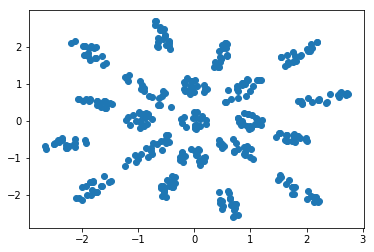

In [50]:
#plt.scatter(data.iloc[:, 0].values, data.iloc[:,1].values)
plt.scatter(data[:, 0], data[:,1])
plt.show()

In [51]:
# Inicializando o K-means utilizando 8 clusters 
# e o método de inicialização random que irá selecionar os centroides de forma aleatória.

In [52]:
kmeans = KMeans(n_clusters = 8, init = 'random')

In [53]:
# Executando o método fit() para agrupar os dados

In [54]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
# Verificando os centroides gerados

In [56]:
kmeans.cluster_centers_

array([[ 2.09137412,  1.19940323],
       [-1.21074099,  2.06346647],
       [-0.35048756, -1.02297091],
       [-1.13746519,  0.43866851],
       [-2.03469621, -1.21923782],
       [ 1.12227393, -0.39203955],
       [ 0.40547169,  1.09592388],
       [ 1.23931208, -2.06587929]])

In [57]:
# Tabela de distâncias
# Cada instância contém três valores, e cada valor corresponde exatamente a distância 
# entre a instância de dados corrente e cada um dos três clusters

In [58]:
distance = kmeans.fit_transform(data)
distance

array([[ 1.86890051,  2.38509486,  1.06388182, ...,  3.21686548,
         1.79876513,  1.56397995],
       [ 2.35828986,  2.33093219,  1.42370996, ...,  3.65121751,
         2.09285725,  1.23138048],
       [ 2.29621711,  2.33132293,  1.3741515 , ...,  3.59504861,
         2.0508335 ,  1.26845593],
       ..., 
       [ 2.59288476,  5.27207315,  1.94678784, ...,  4.12614428,
         4.0514617 ,  3.30755366],
       [ 2.80234404,  5.46433138,  2.12406348, ...,  4.32836564,
         4.25777039,  3.40769035],
       [ 2.29364506,  5.00741889,  1.71711959, ...,  3.83485229,
         3.76139577,  3.19804742]])

In [59]:
# labels para cada instância, ou seja, o código do cluster que a instância de dados foi atribuído

In [60]:
labels = kmeans.labels_
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 0, 0, 0, 3, 0, 6, 0, 0, 0, 3, 0,
       3, 6, 0, 2, 0, 2, 2, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1,

In [61]:
# Utilizando o método Elbow para encontrar o valor ideal do parâmetro k
# Podemos ver que a partir do número de 8 clusters não temos uma diminuição tão expressiva

1 1456.11116843
2 946.074057364
3 601.811501134
4 433.39211795
5 352.943808411
6 284.956580137
7 232.793997732
8 192.400706817
9 156.414735749
10 140.920048815


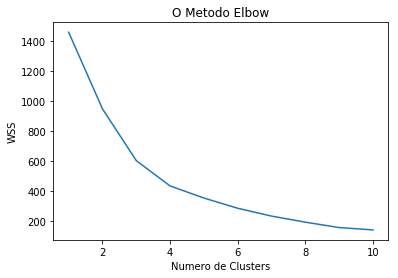

In [62]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(data)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [63]:
# Representação gráfica dos dados e centróides

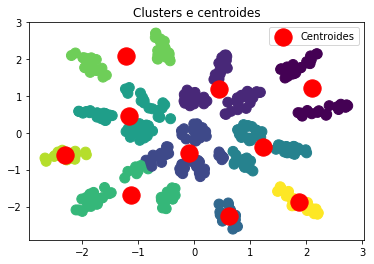

In [64]:
plt.scatter(data[:, 0], data[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroides')
plt.title('Clusters e centroides')

plt.legend()
 
plt.show()
